In [1]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError

bitcoin_aud = share.Share('BTC-AUD')
bitcoin_data = bitcoin_aud.get_historical(
    share.PERIOD_TYPE_DAY, 10,
    share.FREQUENCY_TYPE_MINUTE, 5)

In [4]:
df = pd.DataFrame(bitcoin_data)
df.head()
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='ms')
bitcoin_data.keys()

dict_keys(['timestamp', 'open', 'high', 'low', 'close', 'volume'])

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='ms')
(df.set_index("timestamp")
   .resample('D')
   .mean()
)

,open,high,low,close,volume
timestamp,,,,,
2019-11-28,11192.649426,11197.619723,11185.430752,11190.495839,2.682227e+07
2019-11-29,11256.040246,11261.884047,11251.586100,11257.203705,3.452284e+07
2019-11-30,11380.497786,11384.827769,11375.341037,11379.774424,2.481010e+07
2019-12-01,10916.701365,10922.428043,10911.207794,10916.725657,3.641956e+07
2019-12-02,10792.203762,10797.538845,10786.641205,10791.964695,2.725230e+07
2019-12-03,10724.747453,10729.565223,10719.448157,10724.359758,2.090603e+07
2019-12-04,10689.183974,10694.591359,10683.552544,10688.706977,5.337231e+07
2019-12-05,10768.784885,10776.726088,10762.518365,10769.430620,3.437629e+07
2019-12-06,10879.933434,10884.950039,10875.721151,10880.784244,2.714970e+07


In [6]:
data = df.rename(columns={'timestamp': 'ds', 'open': 'y'})

In [7]:
m = Prophet( yearly_seasonality=False, weekly_seasonality=False)
m.fit(data[['ds','y']])

In [8]:
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2878,2019-12-08 03:00:00,11133.568370,11048.657398,11214.421458
2879,2019-12-08 03:05:00,11134.225726,11063.455929,11211.269526
2880,2019-12-08 03:10:00,11134.814225,11063.425765,11203.623946
2881,2019-12-08 03:12:00,11135.030235,11064.720489,11206.821787
2882,2019-12-09 03:12:00,11252.223981,10176.587447,12263.513256


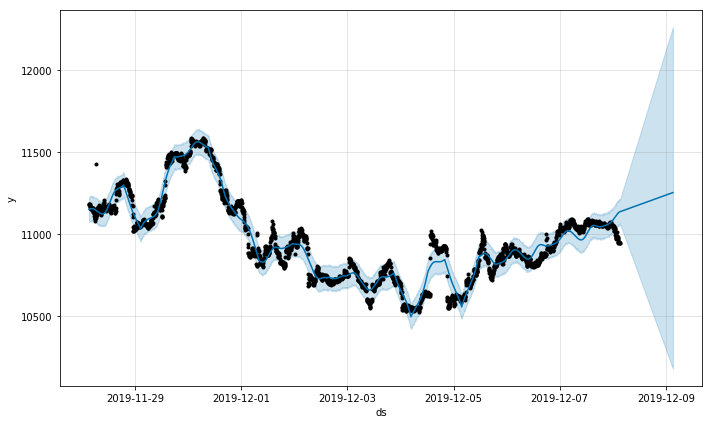

In [9]:
fig1 = m.plot(forecast)
plt.show()

In [10]:
# import panda, keras and tensorflow
import pandas as pd
import tensorflow as tf
import keras
from keras import models, layers
# Load the sample data set and split into x and y data frames 
df = pd.read_csv("game.csv")
x = df.drop(['label'], axis=1)
y = df['label']
# Define the keras model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Use a custom metricfunction
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    keras.backend.get_session().run(tf.local_variables_initializer())
    return auc    
# Compile and fit the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=[auc])
history = model.fit(x, y, epochs=100, batch_size=100,
                    validation_split = .2, verbose=0)
# Save the model in h5 format 
model.save("games.h5")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing 

KeyboardInterrupt: 

In [ ]:
!curl -0 https://raw.githubusercontent.com/bgweber/Twitch/master/Recommendations/games-expand.csv

In [3]:
!ls

Trade-Bot.ipynb game.csv
